In [1]:
import networkx as nx

In [4]:
import os

In [5]:
#pip install openai==0.28
#pip install pyvis

In [10]:
import openai

In [24]:
from pyvis.network import Network


In [16]:
def get_influencers_and_influencees(artist_name):
   # influencers_query = f"Give 5 artists in the format of a list  that influenced {artist_name}? Without summing them "
   # influencees_query = f"Give 5 artists in the format of a list that were influenced by {artist_name}? Without summing them "
    influencers_query = f"Please provide a list of the full names without special charactars of five artists and philosophers that influenced {artist_name}, separated by commas, without any numbers, enumerations or additional text."
    influencees_query = f"Please provide a list of the full names without special charactars of five artists and philosophers that were influenced by {artist_name}, separated by commas, without any numbers, enumerations or additional text."

    influencers_response = openai.ChatCompletion.create(
        messages=[
            {
                "role": "user",
                "content": influencers_query,
            }
        ],
        model="gpt-3.5-turbo",
    )
    
    influencees_response = openai.ChatCompletion.create(
        messages=[
            {
                "role": "user",
                "content": influencees_query,
            }
        ],
        model="gpt-3.5-turbo",
    )
    influencers = influencers_response.choices[0].message.content
    influencees = influencees_response.choices[0].message.content
    return influencers, influencees

In [17]:
artists = ["Claude Monet", "Vincent van Gogh", "Pablo Picasso", "Salvador Dalí", "Georgia O'Keeffe"]
artists = ["Sigmund Freud"]

# Collect data for each artist
artist_influence_data = {}
for artist in artists:
    influencers, influencees = get_influencers_and_influencees(artist)
    artist_influence_data[artist] = {
        "influencers": influencers,
        "influencees": influencees
    }

In [18]:
artist_influence_data

{'Sigmund Freud': {'influencers': 'Arthur Schopenhauer, Friedrich Nietzsche, Gustav Fechner, Henrik Ibsen, Richard von Krafft-Ebing',
  'influencees': 'Rollo May, Carl Jung, Anna O, Jacques Lacan, D. W. Winnicott'}}

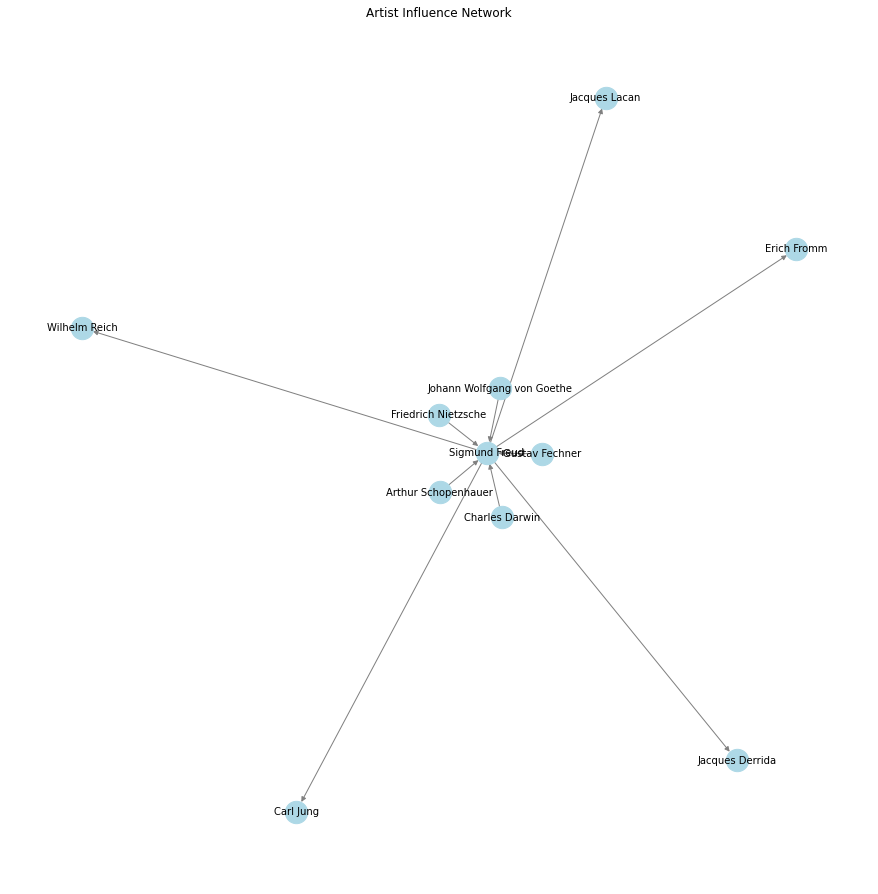

In [135]:
# Create a directed graph
G = nx.DiGraph()
# Add nodes and edges based on the influence data
for artist, influences in artist_influence_data.items():
    G.add_node(artist)
    # Add edges for influencers
    for influencer in influences["influencers"].split(','):
        influencer = influencer.strip()
        if influencer:
            G.add_edge(influencer, artist)
    # Add edges for influencees
    for influencee in influences["influencees"].split(','):
        influencee = influencee.strip()
        if influencee:
            G.add_edge(artist, influencee)

import matplotlib.pyplot as plt
# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_size=500, font_size=10, node_color='lightblue', edge_color='gray')
plt.title("Artist Influence Network")
plt.show()

In [19]:
#Now: do 3 loops 

In [21]:
artists_processed = set()
artists_to_process = set(["Sigmund Freud"])
artist_influence_data = {}

for i in range(3):
    new_artists = set()
    for artist in artists_to_process:
        influencers, influencees = get_influencers_and_influencees(artist)
        for influencer in influencers.split(","):
            new_artists.add(influencer.strip()) 
        for influencee in influencees.split(","):
            new_artists.add(influencee.strip()) 
        artist_influence_data[artist] = {
            "influencers": influencers,
            "influencees": influencees
        }
    artists_processed.update(artists_to_process)
    artists_to_process = new_artists
    

In [22]:
# Create a directed graph
G = nx.DiGraph()  # Use DiGraph for directed graphs
# Add nodes and edges based on the influence data
for artist, influences in artist_influence_data.items():
    G.add_node(artist)
    # Add edges for influencers
    for influencer in influences["influencers"].split(','):
        influencer = influencer.strip()
        if influencer:
            G.add_edge(influencer, artist)
    # Add edges for influencees
    for influencee in influences["influencees"].split(','):
        influencee = influencee.strip()
        if influencee:
            G.add_edge(artist, influencee)

In [25]:
# Create a Pyvis network
net = Network(notebook=True, directed=True)  # Ensure directed=True

# Convert the NetworkX graph to Pyvis
net.from_nx(G)

# Optionally apply layout for better visualization
net.force_atlas_2based()

# Show the interactive graph
net.show("directed_graph.html")

directed_graph.html
